# 必要なライブラリのインポート

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt

2023-05-31 06:09:42.948457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 学習データをロード

In [2]:
img_rows, img_cols = 28, 28
num_classes = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def load_data(img_rows, img_cols, num_classes):
    # データを読み込み、訓練データとテストデータに分割
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # 画像の水平反転
    x_train_flipped = np.flip(x_train, axis=2)
    x_test_flipped = np.flip(x_test, axis=2)
    
    # 元のデータと反転データを結合
    x_train = np.concatenate((x_train, x_train_flipped), axis=0)
    x_test = np.concatenate((x_test, x_test_flipped), axis=0)
    
    # ラベルも同様に結合
    y_train = np.concatenate((y_train, y_train), axis=0)
    y_test = np.concatenate((y_test, y_test), axis=0)
    
    # 画像データの形状を調整
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    
    # 画像データの型を変更し、グレースケールを正規化
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    
    # クラスラベルをOne-hotエンコーディング
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data(img_rows, img_cols, num_classes)

4422102/4422102 [==============================] - 0s 0us/step


# 学習曲線生成関数

In [3]:
def plt_learning_curve(history):
    # 精度の学習曲線
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    # 損失の学習曲線
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

# モデルパターン1: ベース

2023-05-31 00:30:59.137911: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-31 00:30:59.194019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-31 00:30:59.194537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-31 00:30:59.198073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-31 00:30:59.198500: I tensorflow/compile

Epoch 1/8


2023-05-31 00:31:03.899713: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-31 00:31:05.150275: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-31 00:31:07.051828: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f44b00037b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-31 00:31:07.051902: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-31 00:31:07.077550: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-31 00:31:07.419855: I ./tensorflow/compiler/jit/device_compiler.h:180

938/938 [==============================] - 16s 11ms/step - loss: 0.4693 - accuracy: 0.8324 - val_loss: 0.3049 - val_accuracy: 0.8894
Epoch 2/8
938/938 [==============================] - 9s 10ms/step - loss: 0.3135 - accuracy: 0.8879 - val_loss: 0.2634 - val_accuracy: 0.9021
Epoch 3/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2665 - accuracy: 0.9034 - val_loss: 0.2447 - val_accuracy: 0.9104
Epoch 4/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2363 - accuracy: 0.9139 - val_loss: 0.2292 - val_accuracy: 0.9191
Epoch 5/8
938/938 [==============================] - 10s 11ms/step - loss: 0.2126 - accuracy: 0.9218 - val_loss: 0.2130 - val_accuracy: 0.9227
Epoch 6/8
938/938 [==============================] - 10s 11ms/step - loss: 0.1964 - accuracy: 0.9276 - val_loss: 0.2085 - val_accuracy: 0.9259
Epoch 7/8
938/938 [==============================] - 10s 10ms/step - loss: 0.1822 - accuracy: 0.9321 - val_loss: 0.2112 - val_accuracy: 0.9266
Epoch 8/8
93

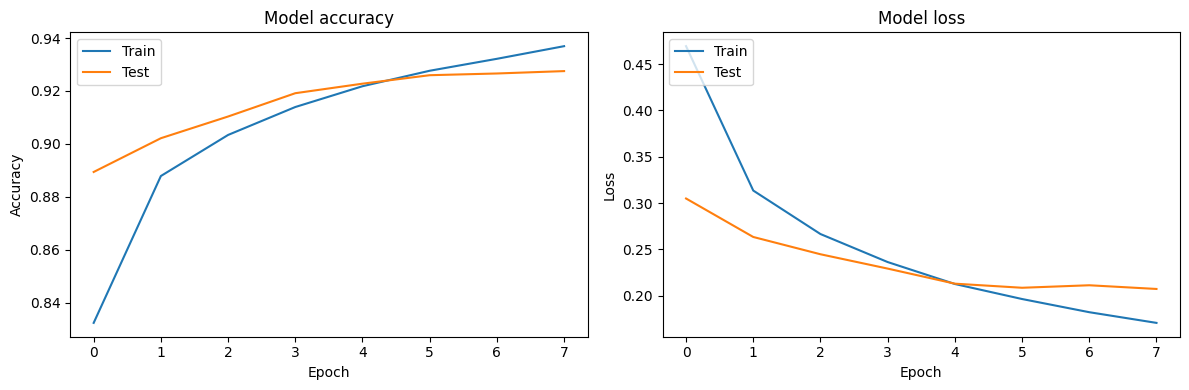

In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=8, verbose=1, validation_data=(x_test, y_test))
plt_learning_curve(history)

# モデルパターン2: Dropoutを削除
過剰に学習データに適合してしまう。結果Trainの精度は上がるがTestの精度は下がってしまう。

Epoch 1/8
938/938 [==============================] - 10s 10ms/step - loss: 0.3647 - accuracy: 0.8704 - val_loss: 0.2732 - val_accuracy: 0.9013
Epoch 2/8
938/938 [==============================] - 9s 9ms/step - loss: 0.2171 - accuracy: 0.9204 - val_loss: 0.2399 - val_accuracy: 0.9106
Epoch 3/8
938/938 [==============================] - 9s 9ms/step - loss: 0.1664 - accuracy: 0.9400 - val_loss: 0.2159 - val_accuracy: 0.9224
Epoch 4/8
938/938 [==============================] - 9s 9ms/step - loss: 0.1313 - accuracy: 0.9517 - val_loss: 0.2227 - val_accuracy: 0.9247
Epoch 5/8
938/938 [==============================] - 9s 9ms/step - loss: 0.0992 - accuracy: 0.9640 - val_loss: 0.2337 - val_accuracy: 0.9247
Epoch 6/8
938/938 [==============================] - 9s 10ms/step - loss: 0.0731 - accuracy: 0.9733 - val_loss: 0.2511 - val_accuracy: 0.9277
Epoch 7/8
938/938 [==============================] - 9s 10ms/step - loss: 0.0535 - accuracy: 0.9806 - val_loss: 0.2704 - val_accuracy: 0.9277
Epoch 8/8

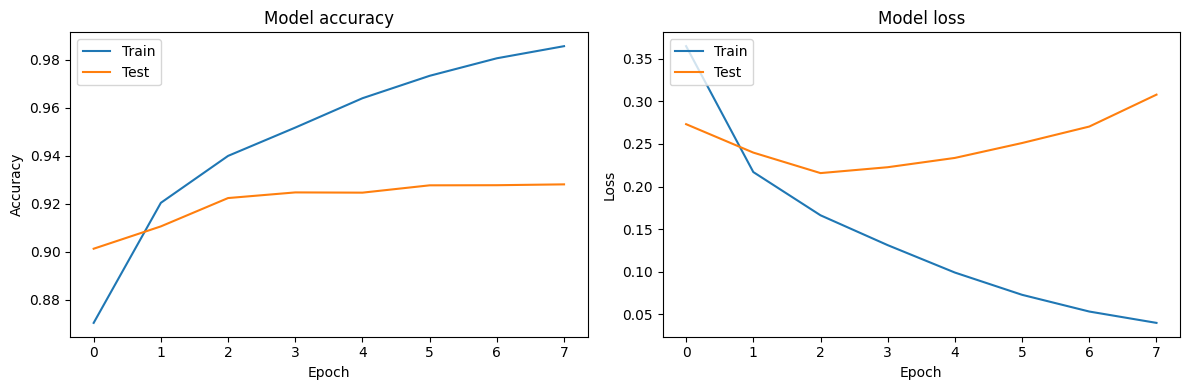

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=8, verbose=1, validation_data=(x_test, y_test))
plt_learning_curve(history)

# モデルパターン3: 最初のDropoutだけを削除
Dropoutなしと同様の結果。

Epoch 1/8
938/938 [==============================] - 11s 10ms/step - loss: 0.4780 - accuracy: 0.8316 - val_loss: 0.3123 - val_accuracy: 0.8879
Epoch 2/8
938/938 [==============================] - 10s 11ms/step - loss: 0.3077 - accuracy: 0.8911 - val_loss: 0.2521 - val_accuracy: 0.9099
Epoch 3/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2584 - accuracy: 0.9068 - val_loss: 0.2411 - val_accuracy: 0.9130
Epoch 4/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2260 - accuracy: 0.9176 - val_loss: 0.2340 - val_accuracy: 0.9135
Epoch 5/8
938/938 [==============================] - 10s 10ms/step - loss: 0.2018 - accuracy: 0.9261 - val_loss: 0.2175 - val_accuracy: 0.9244
Epoch 6/8
938/938 [==============================] - 12s 12ms/step - loss: 0.1816 - accuracy: 0.9319 - val_loss: 0.2108 - val_accuracy: 0.9254
Epoch 7/8
938/938 [==============================] - 10s 11ms/step - loss: 0.1651 - accuracy: 0.9388 - val_loss: 0.2180 - val_accuracy: 0.9272
E

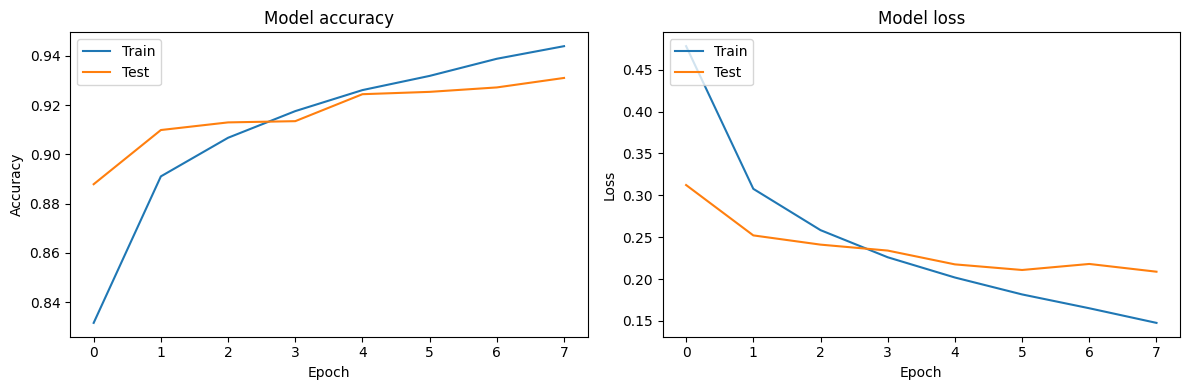

In [15]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=8, verbose=1, validation_data=(x_test, y_test))
plt_learning_curve(history)

# モデルパターン4: MaxPooling2Dを削除
Dropoutなしと同様の結果。

Epoch 1/8


2023-05-31 01:51:50.202074: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 12s 12ms/step - loss: 0.4463 - accuracy: 0.8418 - val_loss: 0.2944 - val_accuracy: 0.8914
Epoch 2/8
938/938 [==============================] - 10s 11ms/step - loss: 0.2906 - accuracy: 0.8954 - val_loss: 0.2533 - val_accuracy: 0.9057
Epoch 3/8
938/938 [==============================] - 11s 11ms/step - loss: 0.2392 - accuracy: 0.9128 - val_loss: 0.2351 - val_accuracy: 0.9140
Epoch 4/8
938/938 [==============================] - 10s 11ms/step - loss: 0.2054 - accuracy: 0.9242 - val_loss: 0.2270 - val_accuracy: 0.9193
Epoch 5/8
938/938 [==============================] - 11s 11ms/step - loss: 0.1799 - accuracy: 0.9338 - val_loss: 0.2290 - val_accuracy: 0.9201
Epoch 6/8
938/938 [==============================] - 11s 11ms/step - loss: 0.1559 - accuracy: 0.9422 - val_loss: 0.2350 - val_accuracy: 0.9233
Epoch 7/8
938/938 [==============================] - 11s 11ms/step - loss: 0.1390 - accuracy: 0.9480 - val_loss: 0.2245 - val_accuracy: 0.9237
Epoch 8/8

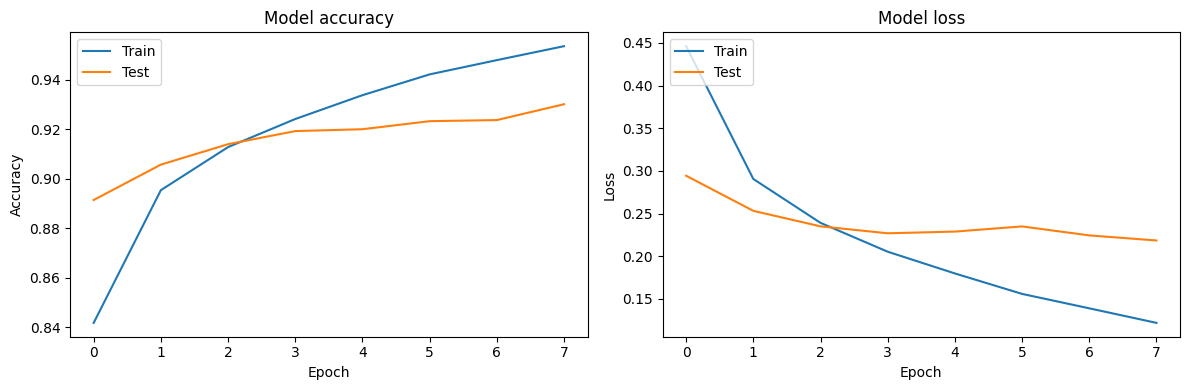

In [13]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=8, verbose=1, validation_data=(x_test, y_test))
plt_learning_curve(history)

# モデルパターン5: Conv2Dを減らす
モデルの複雑さが下がり過学習傾向がなくなる。その分、精度は下がってしまう。

Epoch 1/8


2023-05-31 00:45:12.078566: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 9s 9ms/step - loss: 0.5234 - accuracy: 0.8160 - val_loss: 0.3394 - val_accuracy: 0.8773
Epoch 2/8
938/938 [==============================] - 8s 8ms/step - loss: 0.3575 - accuracy: 0.8725 - val_loss: 0.2981 - val_accuracy: 0.8913
Epoch 3/8
938/938 [==============================] - 8s 8ms/step - loss: 0.3224 - accuracy: 0.8845 - val_loss: 0.2790 - val_accuracy: 0.8985
Epoch 4/8
938/938 [==============================] - 8s 8ms/step - loss: 0.2963 - accuracy: 0.8928 - val_loss: 0.2775 - val_accuracy: 0.9003
Epoch 5/8
938/938 [==============================] - 7s 8ms/step - loss: 0.2814 - accuracy: 0.8977 - val_loss: 0.2640 - val_accuracy: 0.9010
Epoch 6/8
938/938 [==============================] - 8s 8ms/step - loss: 0.2696 - accuracy: 0.9019 - val_loss: 0.2532 - val_accuracy: 0.9074
Epoch 7/8
938/938 [==============================] - 8s 8ms/step - loss: 0.2566 - accuracy: 0.9065 - val_loss: 0.2492 - val_accuracy: 0.9076
Epoch 8/8
938/938 [====

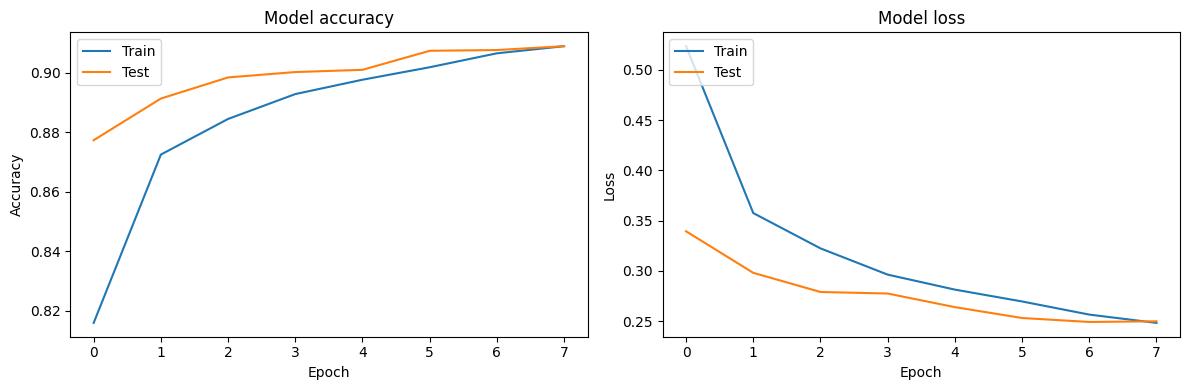

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=8, verbose=1, validation_data=(x_test, y_test))
plt_learning_curve(history)

# モデルパターン5: Poolingのサイズを増やす
モデルの複雑さが下がり過学習傾向が減少、かつ精度も維持できた。

Epoch 1/8


2023-05-31 00:49:01.080646: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 11s 11ms/step - loss: 0.4914 - accuracy: 0.8243 - val_loss: 0.3222 - val_accuracy: 0.8807
Epoch 2/8
938/938 [==============================] - 10s 11ms/step - loss: 0.3273 - accuracy: 0.8831 - val_loss: 0.2610 - val_accuracy: 0.9048
Epoch 3/8
938/938 [==============================] - 10s 11ms/step - loss: 0.2837 - accuracy: 0.8983 - val_loss: 0.2505 - val_accuracy: 0.9075
Epoch 4/8
938/938 [==============================] - 10s 10ms/step - loss: 0.2543 - accuracy: 0.9080 - val_loss: 0.2281 - val_accuracy: 0.9151
Epoch 5/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2329 - accuracy: 0.9151 - val_loss: 0.2156 - val_accuracy: 0.9212
Epoch 6/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2177 - accuracy: 0.9206 - val_loss: 0.2033 - val_accuracy: 0.9255
Epoch 7/8
938/938 [==============================] - 10s 10ms/step - loss: 0.2057 - accuracy: 0.9241 - val_loss: 0.2039 - val_accuracy: 0.9261
Epoch 8/8
9

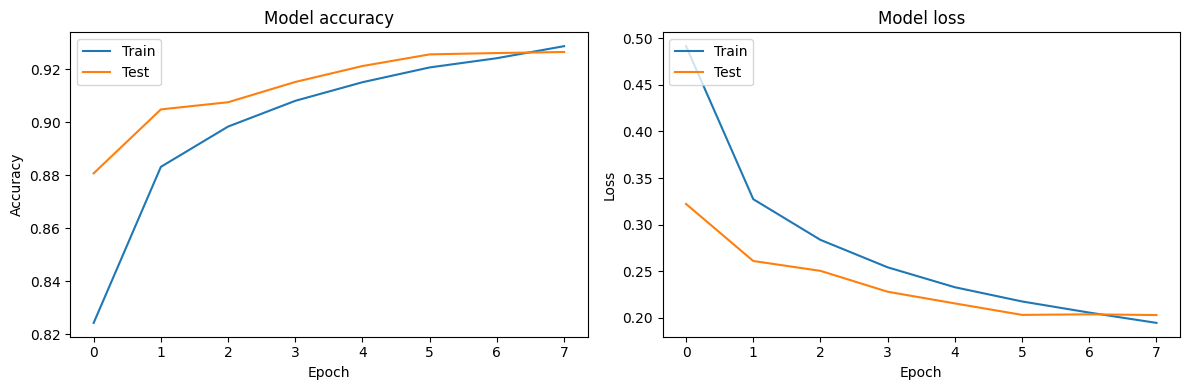

In [8]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=8, verbose=1, validation_data=(x_test, y_test))
plt_learning_curve(history)

Epoch 1/8


2023-05-31 01:36:06.845999: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 12s 11ms/step - loss: 0.5237 - accuracy: 0.8132 - val_loss: 0.3283 - val_accuracy: 0.8804
Epoch 2/8
938/938 [==============================] - 9s 10ms/step - loss: 0.3518 - accuracy: 0.8730 - val_loss: 0.2797 - val_accuracy: 0.8977
Epoch 3/8
938/938 [==============================] - 9s 10ms/step - loss: 0.3073 - accuracy: 0.8890 - val_loss: 0.2495 - val_accuracy: 0.9077
Epoch 4/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2819 - accuracy: 0.8973 - val_loss: 0.2548 - val_accuracy: 0.9061
Epoch 5/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2637 - accuracy: 0.9028 - val_loss: 0.2271 - val_accuracy: 0.9157
Epoch 6/8
938/938 [==============================] - 9s 10ms/step - loss: 0.2496 - accuracy: 0.9084 - val_loss: 0.2193 - val_accuracy: 0.9194
Epoch 7/8
938/938 [==============================] - 10s 10ms/step - loss: 0.2379 - accuracy: 0.9121 - val_loss: 0.2040 - val_accuracy: 0.9258
Epoch 8/8
938/

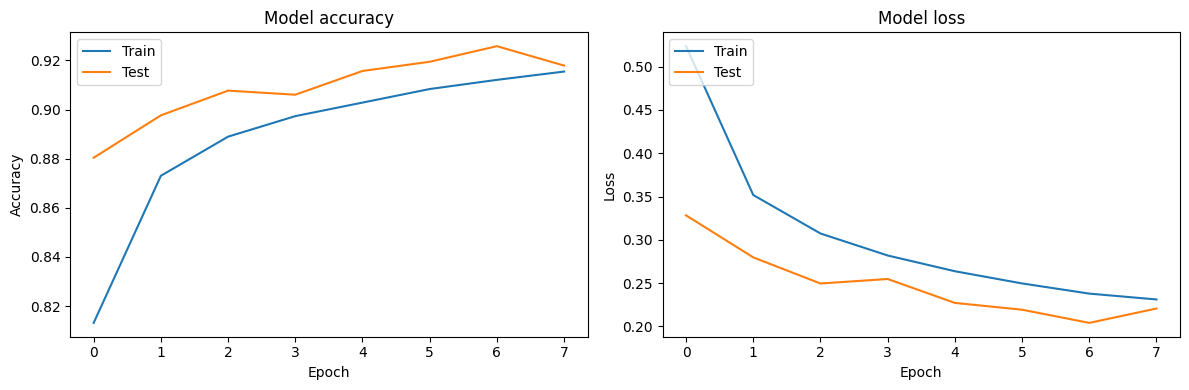

In [9]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=8, verbose=1, validation_data=(x_test, y_test))
plt_learning_curve(history)

Epoch 1/10


2023-05-31 01:47:57.946170: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 11s 11ms/step - loss: 0.4908 - accuracy: 0.8266 - val_loss: 0.3094 - val_accuracy: 0.8873
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.3330 - accuracy: 0.8801 - val_loss: 0.2684 - val_accuracy: 0.9013
Epoch 3/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2890 - accuracy: 0.8958 - val_loss: 0.2384 - val_accuracy: 0.9135
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2640 - accuracy: 0.9038 - val_loss: 0.2263 - val_accuracy: 0.9161
Epoch 5/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2466 - accuracy: 0.9098 - val_loss: 0.2179 - val_accuracy: 0.9207
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2336 - accuracy: 0.9145 - val_loss: 0.2073 - val_accuracy: 0.9237
Epoch 7/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2234 - accuracy: 0.9178 - val_loss: 0.2076 - val_accuracy: 0.9243
Epo

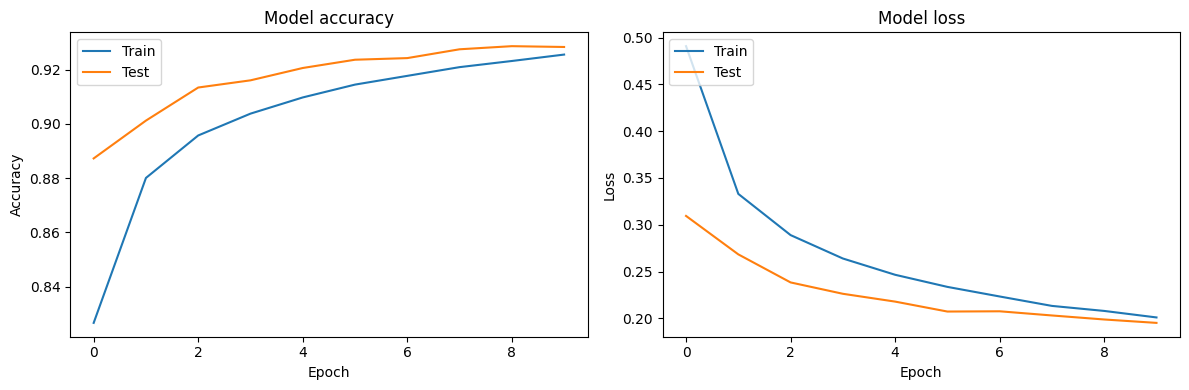

In [12]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, 1)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
plt_learning_curve(history)